# Data Wrangling for [Recruit Restaurant Visitor Forecasting](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting)
---
This document breaks down the data wrangling tasks into the following steps:

* [1. Load Datasets](#1.-Load-Datasets): imports Python libraries and loads data files into DataFrames.


* [2. Visual Inspection](#2.-Visual-Inspection): examines the shape, column names and data types used by DataFrames.
    
    
* [3. Combine Datasets](#3.-Combine-Datasets): joins DataFrames into a single entity.    


* [4. Cleaning Data](#4.-Cleaning-Data): analyses the amount of work that needs to be done and performs the steps necessary to make the data tidy and clean.    


* [5. Preliminary Visual Exploratory Data Analysis](#5.-Preliminary-Visual-Exploratory-Data-Analysis): renders a chart to visualize the amount of reservations and visitations made along the years.

---
## 1. Load Datasets

In [1]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

air_reserve_df = pd.read_csv('data/air_reserve.csv')
air_store_df = pd.read_csv('data/air_store_info.csv')
air_visit_df = pd.read_csv('data/air_visit_data.csv')

hpg_reserve_df = pd.read_csv('data/hpg_reserve.csv')
hpg_store_df = pd.read_csv('data/hpg_store_info.csv')

date_info_df = pd.read_csv('data/date_info.csv')
store_ids_df = pd.read_csv('data/store_id_relation.csv')

Implementation of helper functions:

In [2]:
# Checks columns separately for NaN values
def check_invalid(df): 
    nan_count_df = pd.DataFrame(columns=['NaN values count'])
    
    #print('>>> Number of NaN values found in each column:')
    col_list = list(df.columns.tolist())    
    
    total_nan = 0
    for col_name in col_list:
        nan_count = df[col_name].isnull().sum()        
        #print('\t' + col_name+ ' = ' + str(nan_count))
        nan_count_df.loc[col_name] = nan_count        
        total_nan += nan_count
    
    return nan_count_df, total_nan

---
## 2. Visual Inspection
A brief examination of the dataframes involved helps to get a better sense of the data structures that are going to be manipulated.

In [3]:
def visual_inspect(df, size=3):
    print('>>> Shape =', df.shape)
    display(df.head(size))    
    print('>>> Types\n', df.dtypes)
    #print('\n>>> Info')
    #df.info()

In [4]:
visual_inspect(air_reserve_df)

>>> Shape = (92378, 4)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6


>>> Types
 air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object


In [5]:
visual_inspect(air_store_df)

>>> Shape = (829, 5)


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852


>>> Types
 air_store_id       object
air_genre_name     object
air_area_name      object
latitude          float64
longitude         float64
dtype: object


In [6]:
visual_inspect(air_visit_df)

>>> Shape = (252108, 3)


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29


>>> Types
 air_store_id    object
visit_date      object
visitors         int64
dtype: object


In [7]:
visual_inspect(hpg_reserve_df)

>>> Shape = (2000320, 4)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2


>>> Types
 hpg_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object


In [8]:
visual_inspect(hpg_store_df)

>>> Shape = (4690, 5)


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


>>> Types
 hpg_store_id       object
hpg_genre_name     object
hpg_area_name      object
latitude          float64
longitude         float64
dtype: object


In [9]:
visual_inspect(store_ids_df)

>>> Shape = (150, 2)


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9


>>> Types
 air_store_id    object
hpg_store_id    object
dtype: object


In [10]:
visual_inspect(date_info_df)

>>> Shape = (517, 3)


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1


>>> Types
 calendar_date    object
day_of_week      object
holiday_flg       int64
dtype: object


---
## 3. Combine Datasets
The steps used to combine the datasets are:

<code> air_df = air_visit_df + air_reserve_df       (left)
 air_df = air_df + air_store_df               (inner)
 hpg_df = hpg_reserve_df + hpg_store_df       (inner)
 hpg_df = hpg_df + store_ids_df               (inner)
     df = air_df + hpg_df                     (outer)
     df = df + date_info_df                   (left)
</code>    

### 3.1  `air_df = air_visit_df + air_reserve_df`

In [11]:
# Add a visit_date column for air_reserve
air_reserve_df['visit_datetime'] = pd.to_datetime(air_reserve_df['visit_datetime'])
air_reserve_df['visit_date'] = air_reserve_df['visit_datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))

print('>>> air_visit_df    shape=', air_visit_df.shape) 
print('>>> air_reserve_df  shape=', air_reserve_df.shape) 
print('>>> Merging...\n')

reserve = air_reserve_df[["air_store_id","visit_date","reserve_visitors"]].groupby(["air_store_id","visit_date"], as_index = False).sum()
reserve.rename(columns = {'reserve_visitors': 'reservations'}, inplace = True)
air_df = pd.merge(air_visit_df, reserve, on = ['visit_date','air_store_id'], how = "left")

assert len(air_df) == len(air_visit_df)

print('>>> Result (air_df) shape=', air_df.shape) 
display(air_df.head(3))

# count how many NaNs are there
nan_count_df, total_nan_count = check_invalid(air_df)
display(nan_count_df)

>>> air_visit_df    shape= (252108, 3)
>>> air_reserve_df  shape= (92378, 5)
>>> Merging...

>>> Result (air_df) shape= (252108, 4)


,air_store_id,visit_date,visitors,reservations
0,air_ba937bf13d40fb24,2016-01-13,25,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,NaN


,NaN values count
air_store_id,0
visit_date,0
visitors,0
reservations,224044


### 3.2 `air_df = air_df + air_store_df`

In [12]:
# DEBUG: cut down DataFrame size
# df = df.tail(2)
# air_store_df = air_store_df.tail(2)

print('>>> air_df          shape=', air_df.shape) 
#display(air_df.head(2))

print('>>> air_store_df    shape=', air_store_df.shape) 
#display(air_store_df.head(2))

print('>>> Merging...\n')
air_df = pd.merge(air_df, air_store_df, on="air_store_id", how="inner")

print('>>> Result (air_df) shape=', air_df.shape)
display(air_df.head(3))

# count how many NaNs are there
nan_count_df, total_nan_count = check_invalid(air_df)
display(nan_count_df)

>>> air_df          shape= (252108, 4)
>>> air_store_df    shape= (829, 5)
>>> Merging...

>>> Result (air_df) shape= (252108, 8)


,air_store_id,visit_date,visitors,reservations,air_genre_name,air_area_name,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_ba937bf13d40fb24,2016-01-15,29,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


,NaN values count
air_store_id,0
visit_date,0
visitors,0
reservations,224044
air_genre_name,0
air_area_name,0
latitude,0
longitude,0


### 3.3 `hpg_df = hpg_reserve_df + hpg_store_df`

In [13]:
print('>>> hpg_reserve_df  shape=', hpg_reserve_df.shape) 
#display(hpg_reserve_df.head(2))

print('>>> hpg_store_df    shape=', hpg_store_df.shape) 
#display(hpg_store_df.head(2))

print('>>> Merging...\n')
hpg_df = pd.merge(hpg_reserve_df, hpg_store_df, on="hpg_store_id", how="inner")

print('>>> Result (hpg_df) shape=', hpg_df.shape)
display(hpg_df.head(3))

# count how many NaNs are there
nan_count_df, total_nan_count = check_invalid(hpg_df)
display(nan_count_df)

>>> hpg_reserve_df  shape= (2000320, 4)
>>> hpg_store_df    shape= (4690, 5)
>>> Merging...

>>> Result (hpg_df) shape= (871308, 8)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698


,NaN values count
hpg_store_id,0
visit_datetime,0
reserve_datetime,0
reserve_visitors,0
hpg_genre_name,0
hpg_area_name,0
latitude,0
longitude,0


### 3.4 `hpg_df = hpg_df + store_ids_df`

In [14]:
# convert visit_datetime from string to datetime object to add a new column containing only the Y-M-D
hpg_df['visit_datetime'] = pd.to_datetime(hpg_df['visit_datetime'])
hpg_df['visit_date'] = hpg_df['visit_datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))

print('>>> hpg_df           shape=', hpg_df.shape)
display(hpg_df.head(1))

print('\n>>> store_ids_df   shape=', store_ids_df.shape)
display(store_ids_df.head(1))

# replace the HPG code in hpg_merged_df for its equivalent AIR code
print('>>> Merging...\n')
hpg_df = pd.merge(hpg_df, store_ids_df, on='hpg_store_id', how='inner')

print('\n>>> hpg_df         shape=', hpg_df.shape)
display(hpg_df.head(3))

# count how many NaNs are there
nan_count_df, total_nan_count = check_invalid(hpg_df)
display(nan_count_df)

# DEBUG: print rows that have valid air_store_id and hpg_store_id
valid_ids_df = hpg_df[hpg_df.air_store_id.notnull() & hpg_df.hpg_store_id.notnull()]
valid_ids_percent = len(valid_ids_df.index) / len(hpg_df.index) * 100
print('>>> hpg_df rows with valid HPG & AIR ids: ',  round(valid_ids_percent, 1), '%')

>>> hpg_df           shape= (871308, 9)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,visit_date
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,2016-01-01



>>> store_ids_df   shape= (150, 2)


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a


>>> Merging...


>>> hpg_df         shape= (13528, 10)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,visit_date,air_store_id
0,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2016-01-01,air_db80363d35f10926
1,hpg_878cc70b1abc76f7,2016-01-02 19:00:00,2016-01-02 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2016-01-02,air_db80363d35f10926
2,hpg_878cc70b1abc76f7,2016-01-03 18:00:00,2016-01-02 20:00:00,6,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2016-01-03,air_db80363d35f10926


,NaN values count
hpg_store_id,0
visit_datetime,0
reserve_datetime,0
reserve_visitors,0
hpg_genre_name,0
hpg_area_name,0
latitude,0
longitude,0
visit_date,0
air_store_id,0


>>> hpg_df rows with valid HPG & AIR ids:  100.0 %


### 3.5 `df = air_df + hpg_df`

In [15]:
# rename columns in both dataframes so they blend in nicely during merge
hpg_df.rename(columns={'reserve_visitors': 'reservations'}, inplace=True)
hpg_df.rename(columns={'hpg_genre_name': 'genre_name'}, inplace=True)
hpg_df.rename(columns={'hpg_area_name' : 'area_name'}, inplace=True)
air_df.rename(columns={'air_genre_name': 'genre_name'}, inplace=True)
air_df.rename(columns={'air_area_name' : 'area_name'}, inplace=True)

print('>>> air_df         shape=', air_df.shape)
display(air_df.head(2))
print('>>> hpg_df         shape=', hpg_df.shape)
display(hpg_df.head(2))

print('\n>>> Merging...\n')
hpg_df.drop('hpg_store_id',  axis=1, inplace=True)
df = pd.merge(air_df, hpg_df, how='outer')

print('>>> df             shape=', df.shape)
display(df.head(3))

# count how many NaNs are there
nan_count_df, total_nan_count = check_invalid(df)
display(nan_count_df)

>>> air_df         shape= (252108, 8)


,air_store_id,visit_date,visitors,reservations,genre_name,area_name,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


>>> hpg_df         shape= (13528, 10)


,hpg_store_id,visit_datetime,reserve_datetime,reservations,genre_name,area_name,latitude,longitude,visit_date,air_store_id
0,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2016-01-01,air_db80363d35f10926
1,hpg_878cc70b1abc76f7,2016-01-02 19:00:00,2016-01-02 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2016-01-02,air_db80363d35f10926



>>> Merging...

>>> df             shape= (265636, 10)


,air_store_id,visit_date,visitors,reservations,genre_name,area_name,latitude,longitude,visit_datetime,reserve_datetime
0,air_ba937bf13d40fb24,2016-01-13,25.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaT,NaN
1,air_ba937bf13d40fb24,2016-01-14,32.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaT,NaN
2,air_ba937bf13d40fb24,2016-01-15,29.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaT,NaN


,NaN values count
air_store_id,0
visit_date,0
visitors,13528
reservations,224044
genre_name,0
area_name,0
latitude,0
longitude,0
visit_datetime,252108
reserve_datetime,252108


### 3.6 `df = df + date_info_df`

In [16]:
print('>>> date_info_df   shape=', date_info_df.shape)
display(date_info_df.head(2))

print('>>> df             shape=', df.shape)
display(df.head(2))

# convert column visit_datetime from string to datetime object
df['visit_datetime'] = pd.to_datetime(df['visit_datetime'])

# combine both datasets to add columns 'day_of_week' and 'holiday_flg' to merged_df
print('\n>>> Merging...\n')
df = pd.merge(df, date_info_df, left_on='visit_date', right_on='calendar_date', how='left')
del df['calendar_date']

# reorder columns
#df = df[['air_store_id', area_name', 'genre_name', 'latitude', 'longitude', 'reserve_datetime', 'reservations', 'visit_datetime', 'visit_date', 'visitors', 'day_of_week', 'holiday_flg']]

print('>>> df             shape=', df.shape)
display(df.tail(3))

print(">> There are", len(air_df), "restaurants with AIR and", len(hpg_df), "with HPG. ",len(store_ids_df),' have both.')

# count how many NaNs are there
nan_count_df, total_nan_count = check_invalid(df)
display(nan_count_df)

>>> date_info_df   shape= (517, 3)


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1


>>> df             shape= (265636, 10)


,air_store_id,visit_date,visitors,reservations,genre_name,area_name,latitude,longitude,visit_datetime,reserve_datetime
0,air_ba937bf13d40fb24,2016-01-13,25.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaT,NaN
1,air_ba937bf13d40fb24,2016-01-14,32.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaT,NaN



>>> Merging...

>>> df             shape= (265636, 12)


,air_store_id,visit_date,visitors,reservations,genre_name,area_name,latitude,longitude,visit_datetime,reserve_datetime,day_of_week,holiday_flg
265633,air_84f6876ff7e83ae7,2017-04-08,NaN,3.0,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,2017-04-08 19:00:00,2017-04-03 12:00:00,Saturday,0
265634,air_84f6876ff7e83ae7,2017-04-08,NaN,4.0,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,2017-04-08 20:00:00,2017-03-09 07:00:00,Saturday,0
265635,air_84f6876ff7e83ae7,2017-04-28,NaN,5.0,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,2017-04-28 18:00:00,2017-04-10 22:00:00,Friday,0


>> There are 252108 restaurants with AIR and 13528 with HPG.  150  have both.


,NaN values count
air_store_id,0
visit_date,0
visitors,13528
reservations,224044
genre_name,0
area_name,0
latitude,0
longitude,0
visit_datetime,252108
reserve_datetime,252108


---
## 4. Cleaning Data
The cleaning procedure starts by checking if there are rows full of *NaN* values. If there are, this would indicate a serious problem during the merging procedures. Later, IDs are checked to see if they have valid data. Then, column data types are evaluated and adjusted. The amount of work that needs to be done to clean *NaN* values is also quantified in plot. Finally, a sequence of steps are executed to clean the remaining data.

### 4.1 Checking for *NaN* rows

In [17]:
def check_nan_rows(df):
    ## Store all rows with NaN values
    nan_df = df[pd.isnull(df).any(axis=1)]
    print('>>> Number of rows that have at least ONE NaN value:', len(nan_df.index))
    #display(nan_df.head())

    ## List only rows that have NaN values (in all columns)
    nan_rows_df = nan_df[nan_df.isnull().all(1)]      
    nan_rows_count = len(nan_rows_df.index)
    print('>>> Number of rows completely filled with NaN values:', nan_rows_count)    
    #display(nan_rows_df.head())

    if (nan_rows_count != 0):
        print('>>> Oopsie! Found', nan_rows_count, 'NaN rows:')
        display(nan_rows_df.head())        

In [18]:
check_nan_rows(df)  

>>> Number of rows that have at least ONE NaN value: 265636
>>> Number of rows completely filled with NaN values: 0


### 4.2 Checking for valid IDs

In [19]:
def check_IDs(df):
    # Count how many IDs are NaNs
    print('>>> NaN count on air_store_id:', df.air_store_id.isnull().sum())
    #print('>>> NaN count on hpg_store_id:', df.hpg_store_id.isnull().sum())

    # Count how many rows don't have a valid ID (i.e. air_store_id and hpg_store_id are both NaNs)
    #null_ids_df = df[df.air_store_id.isnull() & df.hpg_store_id.isnull()]
    null_ids_df = df[df.air_store_id.isnull()]
    
    null_ids_count = len(null_ids_df.index)
    print('>>> Number of rows without any IDs:', null_ids_count)
    
    if (null_ids_count != 0):
        display(null_ids_df.head())

    # Check how many IDs don't have any data at all (i.e. all columns are NaNs)
    max_nan_per_row = len(df.columns) - 1    
    df['NaN_count'] = df.isnull().sum(axis=1)    
    invalid_ids_df = df[df['NaN_count'] == max_nan_per_row]    
    
    invalid_ids_count = len(invalid_ids_df.index)
    print('>>> Number of rows with IDs but NO DATA at all connected to them:', invalid_ids_count)
    
    if (invalid_ids_count != 0):
        print('>>> Found', invalid_ids_count, ' rows with IDs that have NO DATA at all')
        display(invalid_ids_df.head())
        
    del df['NaN_count']

In [20]:
check_IDs(df)

>>> NaN count on air_store_id: 0
>>> Number of rows without any IDs: 0
>>> Number of rows with IDs but NO DATA at all connected to them: 0


### 4.3 Checking data types

In [21]:
def get_data_types(df):    
    col_names = df.columns.tolist()
    data_types_df = pd.DataFrame(columns=col_names)    
    
    row = []
    for col in col_names:        
        row.append(str(df[col].dtype))

    data_types_df.loc[0] = row
    return data_types_df

In [22]:
dtypes_df = get_data_types(df)
display(dtypes_df.head())

,air_store_id,visit_date,visitors,reservations,genre_name,area_name,latitude,longitude,visit_datetime,reserve_datetime,day_of_week,holiday_flg
0,object,object,float64,float64,object,object,float64,float64,datetime64[ns],object,object,int64


Most column data types makes sense except `reserve_datetime` and `visit_date`, which should be converted to *datetime* objects:

In [23]:
df['reserve_datetime'] = pd.to_datetime(df['reserve_datetime'])
df['visit_date'] = pd.to_datetime(df['visit_date'])

**The final data types are:**

In [24]:
dtypes_df = get_data_types(df)
display(dtypes_df.head())

,air_store_id,visit_date,visitors,reservations,genre_name,area_name,latitude,longitude,visit_datetime,reserve_datetime,day_of_week,holiday_flg
0,object,datetime64[ns],float64,float64,object,object,float64,float64,datetime64[ns],datetime64[ns],object,int64


### 4.4 Checking for corrupt data (negative values)

In [25]:
# Checks numeric columns for negative numbers
def check_numeric(df):     
    neg_count_df = pd.DataFrame(columns=['Negative values count'])
    
    #print('>>> Number of negative values found in numeric columns:')
    num_col_list = list(df.select_dtypes(include=['int64', 'float64']).columns)    
    
    total_neg = 0
    for col_name in num_col_list:
        neg_count = df[df[col_name] < 0].shape[0]  # extract number of rows        
        #print('\t*' + col_name+ '* = ' + str(neg_count))
        neg_count_df.loc[col_name] = neg_count
        total_neg += neg_count
    
    return neg_count_df, total_neg

In [26]:
neg_count_df, total_neg_count = check_numeric(df)
display(neg_count_df)

,Negative values count
visitors,0
reservations,0
latitude,0
longitude,0
holiday_flg,0


### 4.5 Checking for invalid data (*NaN*)

In [27]:
# count how many NaNs are there
nan_count_df, total_nan_count = check_invalid(df)
display(nan_count_df)

,NaN values count
air_store_id,0
visit_date,0
visitors,13528
reservations,224044
genre_name,0
area_name,0
latitude,0
longitude,0
visit_datetime,252108
reserve_datetime,252108


### 4.6 Missing Data Visualization (*NaN*)

In [28]:
# plots a pie chart to visualize data corruption
def plot_corruption(total_values, total_neg_count, total_nan_count):
    neg_fraction = total_neg_count / total_values * 100
    nan_fraction = total_nan_count / total_values * 100
    ok_fraction  =  (total_values - (neg_fraction + nan_fraction)) / total_values * 100

    # Data to plot
    labels = 'Negative values', 'NaN values', 'Good values'
    sizes = [neg_fraction, nan_fraction, ok_fraction]
    colors = ['orange', 'lightcoral', 'yellowgreen']
    explode = (0.2, 0.2, 0)  # explode 1st and 2nd slice

    # Plot
    plt.subplots(figsize=(9,4))
    patches, texts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=330)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.show()
    
    print('>>>', round(nan_fraction, 1), '% of the values are NaNs.')
    print('>>> There are', total_values, 'cells in the DataFrame. Shape =', df.shape)

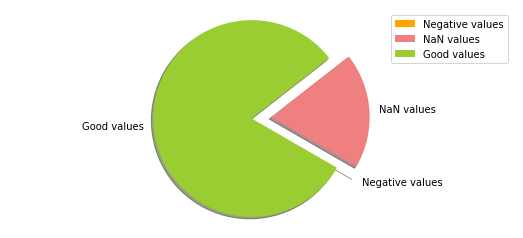

>>> 23.3 % of the values are NaNs.
>>> There are 3187632 cells in the DataFrame. Shape = (265636, 12)


In [29]:
total_values = df.shape[0] * df.shape[1]
plot_corruption(total_values, total_neg_count, total_nan_count)

### 4.7 Dealing with *NaN* values

#### 4.7.1 *NaN* on *string* columns
On these columns, cells that contain *NaN* values are replaced by empty literals:

In [30]:
df['area_name'].fillna(value='', inplace=True)
df['genre_name'].fillna(value='', inplace=True)

#### 4.7.2 *NaN* on float column `air_store_id`

The remaining *NaNs* on these columns are replaced by empty strings:

In [31]:
df['air_store_id'].fillna(value='', inplace=True)

#### 4.7.3 *NaN* on *numeric* columns
All *NaN* values are replaced by `-1`.

In [32]:
df['latitude'].fillna(value=-1, inplace=True)
df['longitude'].fillna(value=-1, inplace=True)

#### 4.7.4 *NaN* on *datetime* columns
Use sentinel value -9999 for missing dates:

In [33]:
df['reserve_datetime'].fillna(value=-9999, inplace=True)
df['visit_datetime'].fillna(value=-9999, inplace=True)

#### 4.7.5 Check for missing data (again)
After all the clean up, no *NaNs* should be found.

In [34]:
nan_count_df, total_nan_count = check_invalid(df)
display(nan_count_df)

,NaN values count
air_store_id,0
visit_date,0
visitors,13528
reservations,224044
genre_name,0
area_name,0
latitude,0
longitude,0
visit_datetime,0
reserve_datetime,0


In [35]:
print('>>> df             shape=', df.shape)
display(df.head())

# save cleaned data to file (~400MB)
#df.to_csv('clean_data.csv', index=False)

>>> df             shape= (265636, 12)


,air_store_id,visit_date,visitors,reservations,genre_name,area_name,latitude,longitude,visit_datetime,reserve_datetime,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,2016-01-13,25.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1969-12-31 23:59:59.999990001,1969-12-31 23:59:59.999990001,Wednesday,0
1,air_ba937bf13d40fb24,2016-01-14,32.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1969-12-31 23:59:59.999990001,1969-12-31 23:59:59.999990001,Thursday,0
2,air_ba937bf13d40fb24,2016-01-15,29.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1969-12-31 23:59:59.999990001,1969-12-31 23:59:59.999990001,Friday,0
3,air_ba937bf13d40fb24,2016-01-16,22.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1969-12-31 23:59:59.999990001,1969-12-31 23:59:59.999990001,Saturday,0
4,air_ba937bf13d40fb24,2016-01-18,6.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1969-12-31 23:59:59.999990001,1969-12-31 23:59:59.999990001,Monday,0


## 5. Preliminary Visual Exploratory Data Analysis
Plot the number of reservations (per week) in contrast with the number of visitations (per week).

In [36]:
# debug: cut the size of the dataframe to 100 rows
#merged_df = merged_df.head(100)
#display(merged_df.head(3))

print(">>> Min date:", df.visit_datetime.min())
print(">>> Max date:", df.visit_datetime.max())
print(">>> Number of days:", len(df['visit_datetime'].dt.normalize().value_counts().index))

>>> Min date: 1969-12-31 23:59:59.999990001
>>> Max date: 2017-05-26 19:00:00
>>> Number of days: 504


In [37]:
def plot_reservation_vs_visitors(df):
    # set a datetime index so resample() works properly
    df = df.set_index('visit_date')
    reservations_made_df = df.resample('W').apply({'visitors':'count'})
    visitors_df = df.resample('W').apply({'visitors':'sum'})

    activity_df = pd.concat([reservations_made_df, visitors_df], join='inner', axis=1)
    activity_df.columns = ['reservations_made', 'visitors']

    fig, ax = plt.subplots(figsize=(15,5))

    # There's a bug in Pandas' plot() that handles data differently than Matplotlib's plot()
    # What this means is that if you use Pandas' plot() you cannot change xticks values later.
    #ax = activity_df.plot(kind='area', ax=ax, stacked=True, title='Reservations made and number of visitors (per week)')

    # alternative method: use matplotlib's plot_date() and configure xticks at will
    plt.plot_date(activity_df.index.to_pydatetime(), activity_df, fmt='-')
    plt.title('Number of reservations made VS visitors (per week)')    
    ax = plt.gca()
    ax.xaxis.grid(True, which="major")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

    d = activity_df.index.to_pydatetime()
    reserve_min = activity_df['reservations_made']
    
    h_r = plt.fill_between(d, reserve_min, activity_df['visitors'], 
                           facecolor='orange', alpha=0.5)

    h_v = plt.fill_between(d, 0, activity_df['reservations_made'], 
                           activity_df['visitors'] >= activity_df['reservations_made'],
                           facecolor='blue', alpha=0.5, interpolate=True)


    plt.legend(handles=[h_r, h_v], labels=["Visitors", "Reservations"], loc='upper left')

    ax.set_ylabel('Number of people')
    ax.margins(0.005, 0) # set margins to avoid "whitespace" while showing the first x-tick
    plt.show()

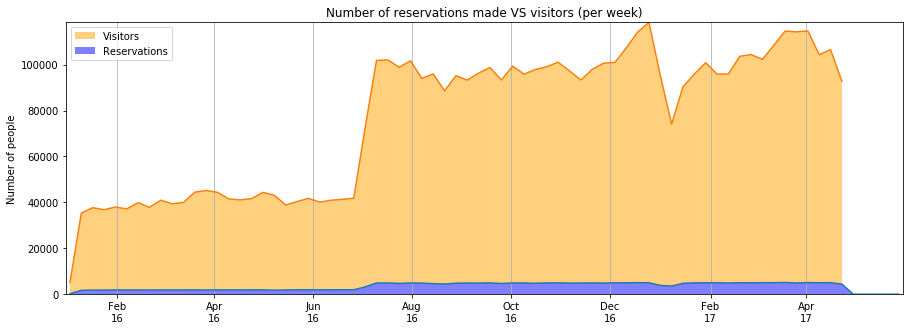

In [38]:
plot_reservation_vs_visitors(df)